In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Avinash\Desktop\Projects\P7=Datamart\bigdatamart_Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Filling the Missing Values

In [6]:
df["Item_Weight"]=df["Item_Weight"].fillna(df["Item_Weight"].mean())

In [7]:
mode_of_outlet_size=df.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))

In [8]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [9]:
missing_values=df["Outlet_Size"].isnull()

In [10]:
df.loc[missing_values,"Outlet_Size"]=df.loc[missing_values,"Outlet_Type"].apply(lambda x:mode_of_outlet_size)

# --------------------------------------------------------------------------------------------------------------

# Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
objList = df.select_dtypes(include = "object").columns

In [15]:
le = LabelEncoder()

for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

In [16]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,780.826822,12.857645,1.369354,0.066132,8.567758,140.992782,4.722281,1997.831867,1.733779,1.112871,1.201220,2181.288914
std,451.116482,4.226124,0.644810,0.051598,4.643519,62.275067,2.837201,8.371760,0.987183,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,389.000000,9.310000,1.000000,0.026989,5.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,10.000000,143.012800,5.000000,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,1173.000000,16.000000,2.000000,0.094585,12.000000,185.643700,7.000000,2004.000000,3.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,3.000000,2.000000,3.000000,13086.964800


# EDA

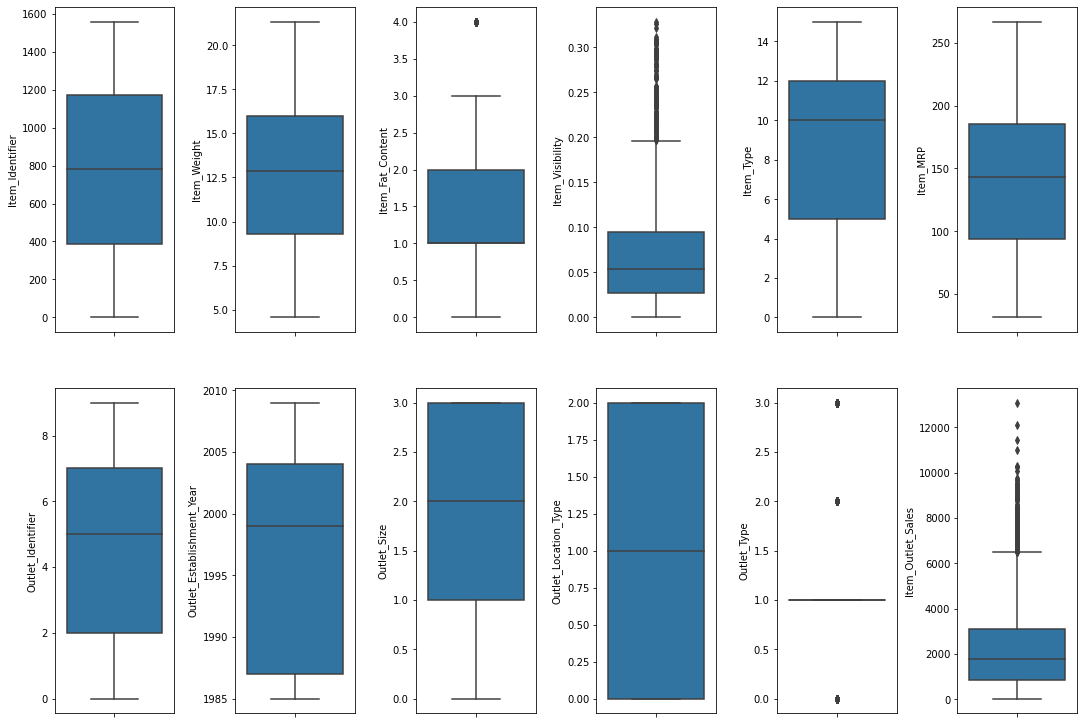

In [18]:
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(15,10))
index=0
ax=ax.flatten()

for col,value in df.items():
        sn.boxplot(y=col,data=df,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# Outlier Removal

In [23]:
from scipy.stats import zscore

In [24]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [25]:
df.shape

(8222, 12)

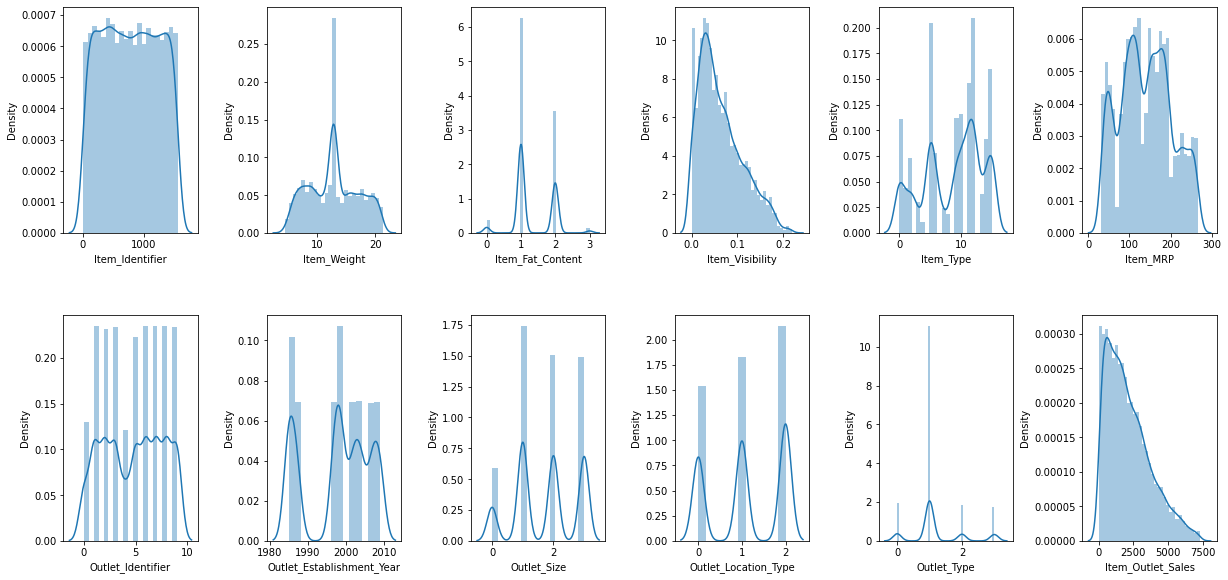

In [26]:
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(17,8))
index=0
ax=ax.flatten()

for col,value in df.items():
        sn.distplot(value,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# Skewness

In [27]:
df.skew()

Item_Identifier              0.012698
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                   -0.383168
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.129756
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

In [28]:
from scipy.stats import boxcox

## Item_Visibility 

In [30]:
i=np.sqrt(df["Item_Visibility"])
i.skew()

-0.24480266386739333

In [31]:
df["Item_Visibility"]=i

## Outlet_Type

In [37]:
o=np.log10(df["Outlet_Type"]+1)
o.skew()

-0.23622850877862686

In [38]:
df["Outlet_Type"]=o

## Item_Outlet_Sales

In [42]:
t=np.sqrt(df["Item_Outlet_Sales"])
t.skew()

-0.36054220719458496

In [43]:
df["Item_Outlet_Sales"]=t

# Splitting the data

In [44]:
x=df.drop(["Item_Outlet_Sales"],axis=1)

In [45]:
y=df["Item_Outlet_Sales"]

# Training Model and Splitting it into train and test

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [55]:
#regression function
from sklearn.model_selection import cross_val_score,train_test_split
def regress(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.25,random_state=7)
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("R2:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [56]:
LR=LinearRegression()
regress(LR,x,y)

R2: 59.719699150454794
CV Score: 60.1012409658927
Diffrence: 0.381541815437906


In [57]:
DTR = DecisionTreeRegressor()
regress(DTR,x,y)

R2: 33.98779387463564
CV Score: 36.09611994895633
Diffrence: 2.1083260743206864


In [58]:
RDG=Ridge()
regress(RDG,x,y)

R2: 59.74997540541618
CV Score: 60.09771483321521
Diffrence: 0.3477394277990271


In [59]:
LSO=Lasso()
regress(LSO,x,y)

R2: 28.655659503202934
CV Score: 28.798734225965788
Diffrence: 0.14307472276285438


In [60]:
RFR=RandomForestRegressor()
regress(RFR,x,y)

R2: 65.51912278871279
CV Score: 65.77690350276916
Diffrence: 0.2577807140563664


In [61]:
KNR=KNeighborsRegressor()
regress(KNR,x,y)

R2: 16.40311191240783
CV Score: 17.776198710953413
Diffrence: 1.3730867985455824


In [63]:
XGB=XGBRegressor()
regress(XGB,x,y)

R2: 61.0152787018052
CV Score: 64.84663948835332
Diffrence: 3.8313607865481174


# Hyper Parameter Tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [66]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [67]:
rf = RandomForestRegressor()

In [68]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.25,random_state=7)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [71]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [76]:
def evaluate(model, X_test, Y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - Y_test)
    mape = 100 * np.mean(errors / Y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

Model Performance
Average Error: 0.6827 degrees.
Accuracy = 88.68%.


In [79]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model, X_test, Y_test)

Model Performance
Average Error: 0.6827 degrees.
Accuracy = 88.68%.


In [77]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)

Model Performance
Average Error: 0.6334 degrees.
Accuracy = 89.41%.


In [78]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.83%.


# Saving the model

In [81]:
import joblib
joblib.dump(best_random,r"C:\Users\Avinash\Desktop\Projects\P7=Datamart\bigdatamart.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\P7=Datamart\\bigdatamart.pkl']